In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
num_users = 20  
num_products = 10  


np.random.seed(42)  
ratings_matrix = np.random.randint(0, 6, size=(num_users, num_products))

ratings_df = pd.DataFrame(ratings_matrix, columns=[f'Product {i+1}' for i in range(num_products)])
ratings_df.index = [f'User {i+1}' for i in range(num_users)]

print("Kullanıcı-Ürün Puanlama Tablosu:")
print(ratings_df)

Kullanıcı-Ürün Puanlama Tablosu:
         Product 1  Product 2  Product 3  Product 4  Product 5  Product 6  \
User 1           3          4          2          4          4          1   
User 2           3          2          5          4          1          3   
User 3           4          0          3          1          5          4   
User 4           2          1          3          3          5          5   
User 5           0          2          4          2          4          0   
User 6           5          1          1          0          1          4   
User 7           3          4          2          5          0          3   
User 8           5          5          1          3          5          4   
User 9           1          5          3          5          5          3   
User 10          1          4          1          0          3          3   
User 11          4          0          0          0          0          3   
User 12          2          0          2   

In [5]:
user_similarity = cosine_similarity(ratings_df)

user_similarity_df = pd.DataFrame(user_similarity, 
                                   index=ratings_df.index, 
                                   columns=ratings_df.index)

print("\nKullanıcılar Arası Benzerlik Matrisi:")
print(user_similarity_df)


Kullanıcılar Arası Benzerlik Matrisi:
           User 1    User 2    User 3    User 4    User 5    User 6    User 7  \
User 1   1.000000  0.795147  0.707107  0.817913  0.823387  0.683243  0.868710   
User 2   0.795147  1.000000  0.692777  0.836178  0.759935  0.709084  0.830347   
User 3   0.707107  0.692777  1.000000  0.877734  0.625889  0.698336  0.539360   
User 4   0.817913  0.836178  0.877734  1.000000  0.713074  0.731564  0.688102   
User 5   0.823387  0.759935  0.625889  0.713074  1.000000  0.444944  0.667308   
User 6   0.683243  0.709084  0.698336  0.731564  0.444944  1.000000  0.722514   
User 7   0.868710  0.830347  0.539360  0.688102  0.667308  0.722514  1.000000   
User 8   0.862698  0.633594  0.757266  0.781469  0.575616  0.753882  0.718550   
User 9   0.909277  0.752728  0.573201  0.780028  0.836975  0.661751  0.834246   
User 10  0.792825  0.767547  0.649800  0.769832  0.756657  0.698380  0.744475   
User 11  0.537204  0.693883  0.698454  0.645323  0.299641  0.891232  0

In [7]:
def recommend_products(user_id, ratings_df, user_similarity_df, top_n=3):
    """
    Belirtilen kullanıcı için en çok önerilecek ürünleri bulmak.
    
    Degerler:
    - user_id: Öneri yapılacak kullanıcı (örneğin "User 1").
    - ratings_df: Kullanıcı-Ürün puanlama tablosu.
    - user_similarity_df: Kullanıcılar arası benzerlik matrisi.
    - top_n: Önerilecek ürün sayısı.
    """
    # Benzer kullanıcıları sıralama
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:]  # İlk kullanıcı kendisi
    similar_users_ratings = ratings_df.loc[similar_users]
    
    # Ürün puanlarının ortalamasını hesaplama
    product_scores = similar_users_ratings.mean(axis=0)
    
    # Kullanıcının zaten puanladığı ürünleri çıkarma
    already_rated = ratings_df.loc[user_id][ratings_df.loc[user_id] > 0].index
    recommendations = product_scores.drop(index=already_rated).sort_values(ascending=False).head(top_n)
    return recommendations

In [11]:
test_user_id = "User 5"  

recommendations = recommend_products(test_user_id, ratings_df, user_similarity_df, top_n=5)

print(f"\n{test_user_id} için önerilen ürünler:")
print(recommendations)


User 5 için önerilen ürünler:
Product 6    2.894737
Product 1    2.473684
Product 9    2.157895
dtype: float64


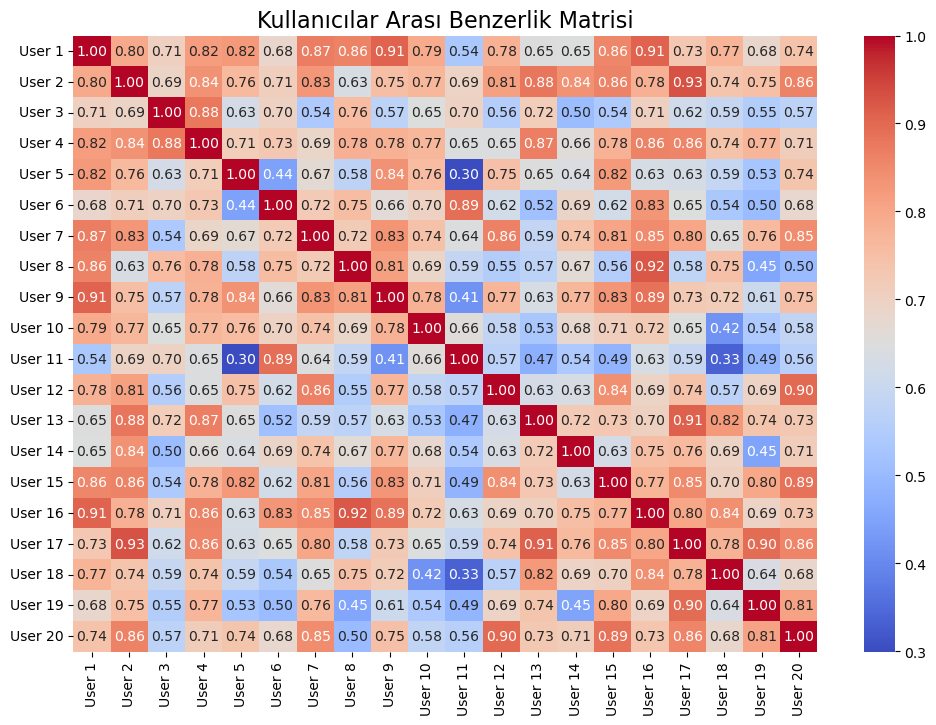

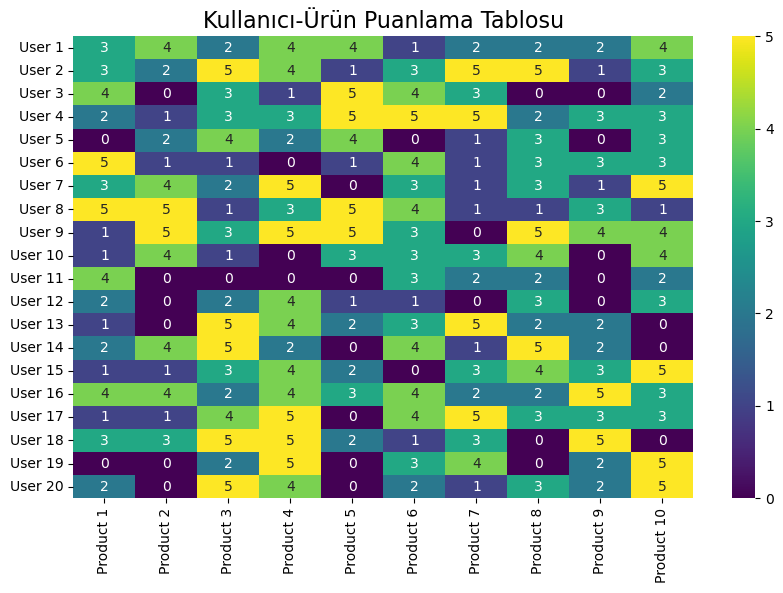

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(user_similarity_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Kullanıcılar Arası Benzerlik Matrisi", fontsize=16)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(ratings_df, annot=True, cmap="viridis", cbar=True, fmt="d")
plt.title("Kullanıcı-Ürün Puanlama Tablosu", fontsize=16)
plt.show()

In [ ]:
S